## Scripts to plot OOI DAS data. 

- Yiyu Ni (niyiyu@uw.edu)
- Feb 9th, 2022
- Dept. of Earth and Space Sciences
- University of Washington

In [20]:
# Uncomment the following two lines to install tqdm. This syntax will allow one to run sermeq.
# Only needs to be run once.

# import sys
# !{sys.executable} -m pip install tqdm scipy h5py matplotlib 

In [10]:
import h5py
import os
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy
from scipy.signal import butter, sosfilt
path = "/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/"

In [2]:
file = "South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T232714Z.h5"
f = h5py.File(path + file, 'r')
data = f['Acquisition']['Raw[0]']['RawData'][:, :].astype('int64')
timestamp = f['Acquisition']['Raw[0]']['RawDataTime'][:] / 1000000

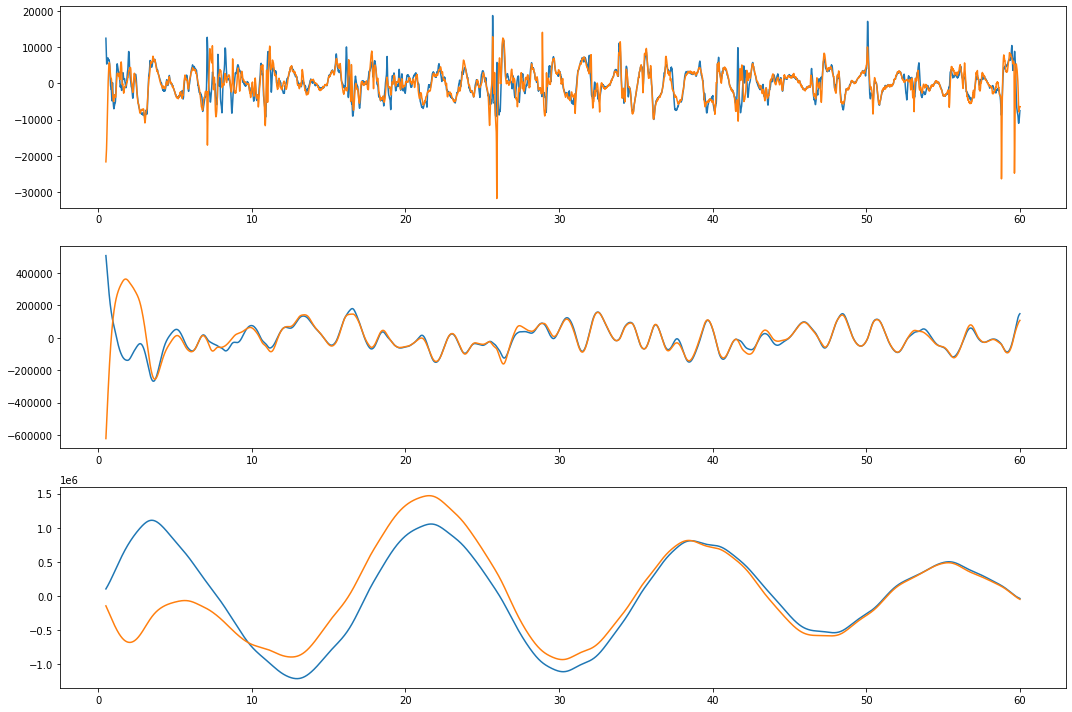

In [38]:
x_lims = list(map(datetime.utcfromtimestamp, [timestamp[0], timestamp[-1]]))
x_lims = mdates.date2num(x_lims)
y_lims = [0, 47500]

channel_to_plot = 20000
ranges = ((10,100),(1,7),(0.1,1))
nsubplots = len(ranges)
fig, ax = plt.subplots(nsubplots,1,figsize = (15, 10))
fig.patch.set_facecolor('white') # Good for dark themed notebooks

for i in range(nsubplots):
    plt.subplot(nsubplots,1,i+1)
    t = np.linspace(0,60,filtered.shape[0])
    sos = butter(2, ranges[i], 'bp', fs=1000, output='sos')
    for channel in (channel_to_plot,channel_to_plot+1):
        filtered = sosfilt(sos, data[channel, :])

        plt.tight_layout()
        plt.plot(t[100:],filtered[100:])
        plt.title